<h3>Task 2: Prediction using Unsupervised ML</h3>
<p>

<a href="https://bit.ly/3kXTdox">Link to Data</a>

1. Predict <ins>optimum number of clusters</ins>, <ins>Based on first 2 Columns</ins> (Assumed, as question did not state based on what information.)
2. Represent clusters visually

Use K-means cluster

</p>

<h6>
Task Submission:

1. Host on Public Git Repo
2. Record Code in video, post on youtube
3. Share link of code & video, on LinkedIn Profile
4. Submit LinkedIn link in task submission form

</h6>


In [115]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [116]:
# Import Data
irisData = pd.read_csv("TSF_Data2.csv")
print(irisData.head())
irisData.dtypes

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [117]:
# Assume it is clustering based on first 2 columns

irisData[["SepalLengthCm", "SepalWidthCm"]].values

# irisData[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

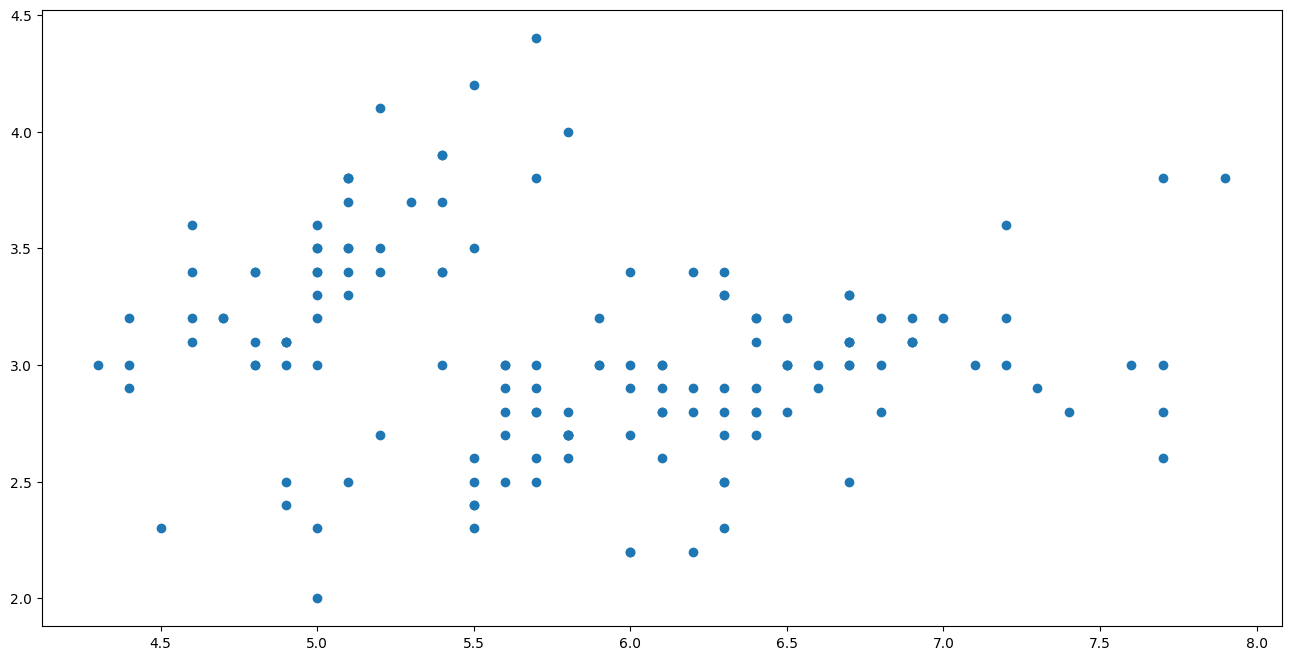

In [118]:
# Plot iris data for first 2 columns
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = irisData["SepalLengthCm"].values, y = irisData["SepalWidthCm"].values)
# plt.scatter(x = irisData["PetalLengthCm"].values, y = irisData["PetalWidthCm"].values)


In [119]:
# Import KMeans
from sklearn.cluster import KMeans

In [120]:
# Fit into kmeans model and find the Within Cluster Sum of Squares from 1 cluster to 10 clusters
clusterDF = pd.DataFrame(irisData[["SepalLengthCm", "SepalWidthCm"]])

minCluster = 1
maxCluster = 10

# Find WCSS
wcss = []
for i in range(minCluster, maxCluster + 1):
    kmeans = KMeans(n_clusters = i, n_init = 10)
    kmeans.fit(clusterDF)
    wcss.append(kmeans.inertia_)
wcss

[130.18093333333334,
 57.982406042078765,
 37.12370212765958,
 27.95870982492085,
 20.97661980044561,
 17.314828843591844,
 14.684777655677658,
 12.754228243021348,
 11.377126551226553,
 9.568687500000001]

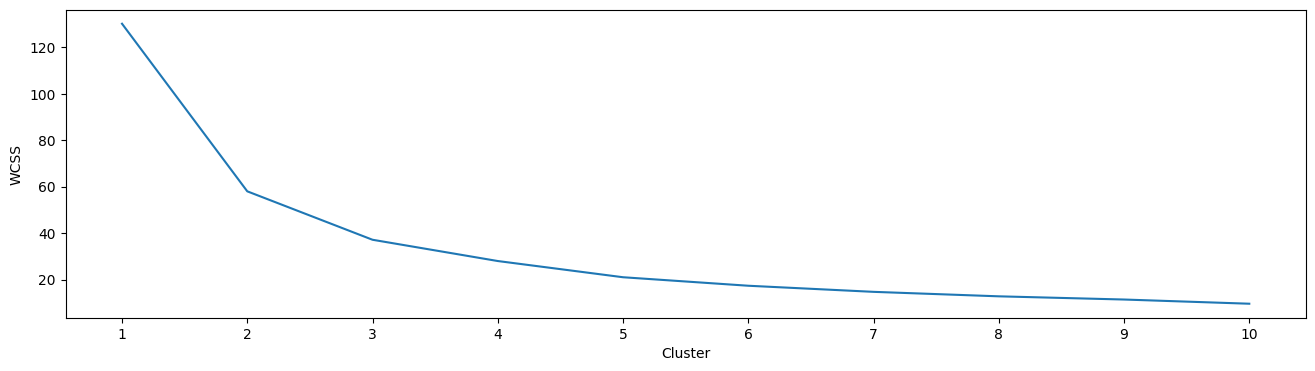

In [121]:
# Plot WCSS vs Clusters to get elbow plot
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(minCluster, maxCluster + 1), wcss)
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show()

# Best one to take would be 3 or 4

In [122]:
# Use optimal cluster number, 3
# Use Kmeans++ as the algo (Better clustering)
kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = 30)
kmeans.fit(clusterDF)
# kmeans.cluster_centers_

print("\t\t\t\t\tSepalLengthCm\tSepalWidthCm")
# Find cluster centers
for i, avg in enumerate(kmeans.cluster_centers_):
    print(f"Cluster Number: {i}", end = "\t")
    print(f"Cluster Coords: {avg}")

print(f"WCSS: {kmeans.inertia_}")

					SepalLengthCm	SepalWidthCm
Cluster Number: 0	Cluster Coords: [5.006 3.418]
Cluster Number: 1	Cluster Coords: [6.81276596 3.07446809]
Cluster Number: 2	Cluster Coords: [5.77358491 2.69245283]
WCSS: 37.12370212765958


In [123]:
# Categorize Cluster
categories = kmeans.predict(clusterDF)
print(categories)
labelledDF = clusterDF.copy()
labelledDF["Cluster"] = pd.Categorical(categories) 
labelledDF

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


,SepalLengthCm,SepalWidthCm,Cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


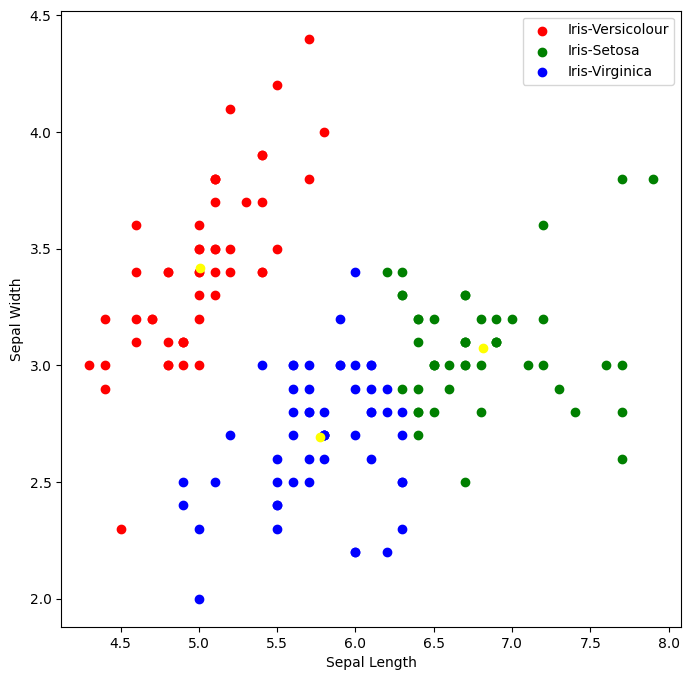

In [132]:
# Plot with colour code from each cluster
# Observe clusters and assign names of iris type
f, axes = plt.subplots(1, 1, figsize=(8,8))
plt.scatter(x = labelledDF.loc[labelledDF["Cluster"] == 0, "SepalLengthCm"], 
            y = labelledDF.loc[labelledDF["Cluster"] == 0, "SepalWidthCm"], c = "red", label = "Iris-Versicolour")

plt.scatter(x = labelledDF.loc[labelledDF["Cluster"] == 1, "SepalLengthCm"], 
            y = labelledDF.loc[labelledDF["Cluster"] == 1, "SepalWidthCm"], c = "green", label = "Iris-Setosa")

plt.scatter(x = labelledDF.loc[labelledDF["Cluster"] == 2, "SepalLengthCm"], 
            y = labelledDF.loc[labelledDF["Cluster"] == 2, "SepalWidthCm"], c = "blue", label = "Iris-Virginica")
# Visualize center points too
for i in kmeans.cluster_centers_:
    plt.scatter(x = i[0], y = i[1], c = "yellow")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


